# Retrieve Google Scholar data

In [1]:
pip install scholarly 

     ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
     ---------------------------- --------- 41.0/55.1 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 55.1/55.1 kB 712.1 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparin

## Get citations and h-index from names

In [ ]:
import pandas as pd
from scholarly import scholarly

# Define the list of researchers with their affiliations if copy pasted
# if using a file, go below to read the file
# researchers = [
#    "Christophe Godlewski", "Nihat Aktas", "Laetitia Lepetit", "Valérie Mignon"
#    ]

# Function to retrieve citation data and h-index for a list of researchers
def get_citation_data(researchers):
    citation_data = {}
    for researcher in researchers:
        try:
            # Search by author name
            search_query = scholarly.search_author(researcher)
            author = next(search_query)
            
            # Retrieve the filled author object
            author_filled = scholarly.fill(author)
            
            # Extract the citation count and h-index
            citation_count = author_filled['citedby']
            h_index = author_filled['hindex']
            
            # Store the data in a dictionary
            citation_data[researcher] = {'citations': citation_count, 'h-index': h_index}
        except Exception as e:
            print(f"Error retrieving data for {researcher}: {e}")
            citation_data[researcher] = {'citations': None, 'h-index': None}
    
    return citation_data

# Read the list of researchers from a text file
input_file = r'C:\Users\GODLEWSKI\OneDrive - unistra.fr\EDITORIAL & REFEREEING\Revue FINANCE\board.txt'  # Replace with your text file path
df = pd.read_csv(input_file, sep=', (?=\()', engine='python')
researchers = df['NAME'].tolist()

print(researchers[:15])

# Retrieve the citation data for the list of researchers
citation_info = get_citation_data(researchers)

# Convert the citation data to a DataFrame
output_df = pd.DataFrame(citation_info)

# Transpose the DataFrame
output_df = output_df.transpose()

# Print the citation data and h-index for each researcher
for researcher, data in citation_info.items():
    print(f"Researcher: {researcher}, Citations: {data['citations']}, H-index: {data['h-index']}")

# Reset the index of the DataFrame
output_df = output_df.reset_index()

# Rename the columns
output_df.columns = ['NAME', 'citations', 'h-index']

# Write the citation data to an Excel file
output_file = 'citation_data.xlsx'  # Replace with your desired output file path
output_df.to_excel(output_file, index=False)

### Hbar graph for data above

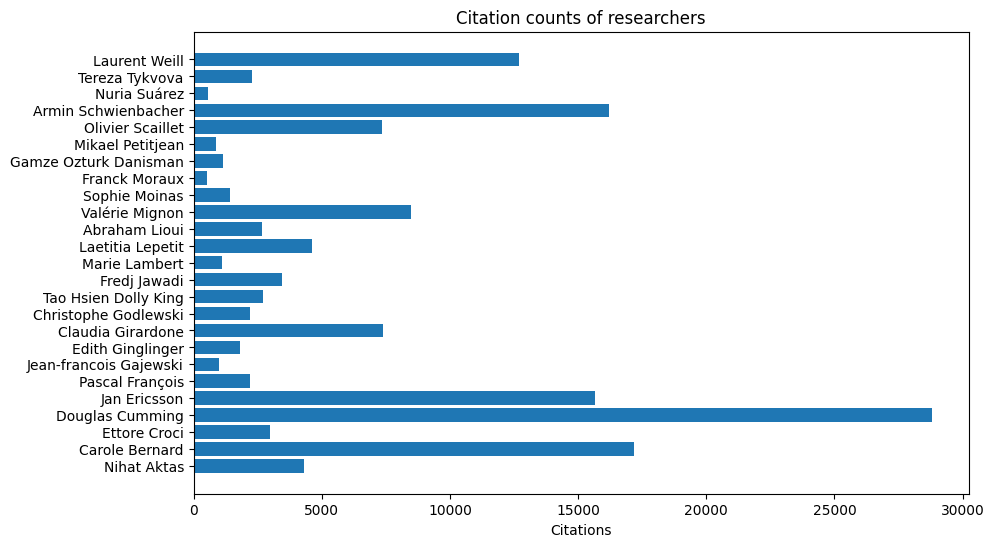

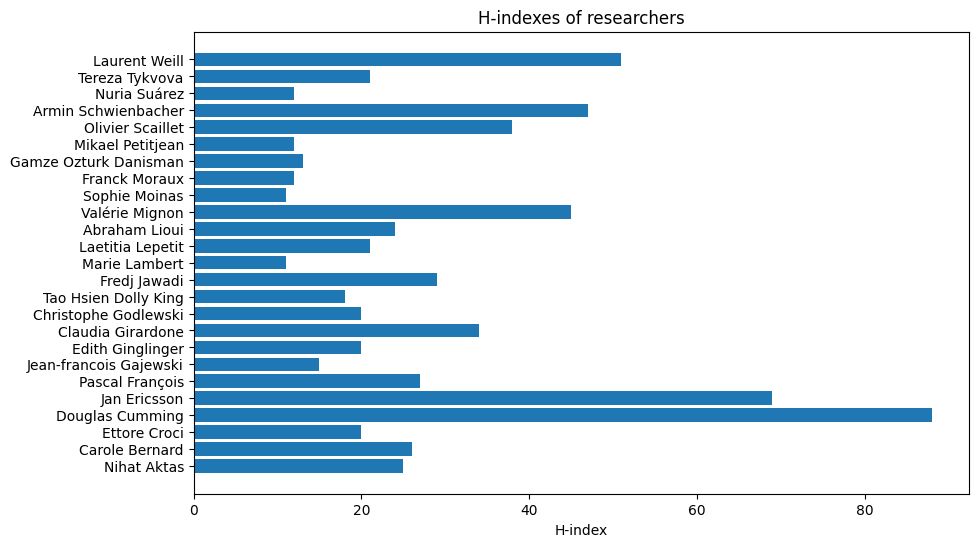

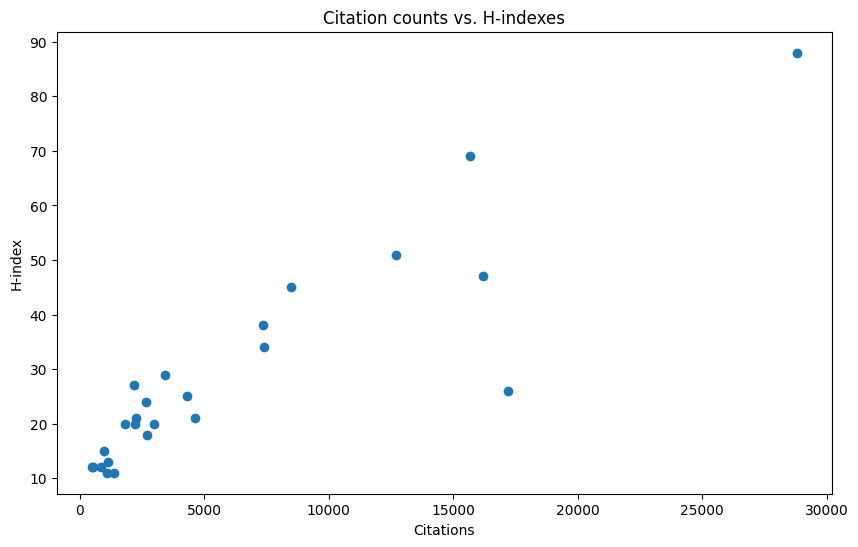

In [27]:
import matplotlib.pyplot as plt

# Drop rows with None in either 'citations' or 'h-index' columns
output_df = output_df.dropna(subset=['citations', 'h-index'])

# Sort the DataFrame in ascending order
# output_df = output_df.sort_values('citations', ascending=True)
# output_df = output_df.sort_values('h-index', ascending=True)

# Sort the DataFrame by the second word in the researcher names
output_df = output_df.sort_values(by='NAME', key=lambda x: x.str.split().str[1])

# Now you can create your plots
# Create a horizontal bar chart of the citation counts
plt.figure(figsize=(10, 6))
plt.barh(output_df['NAME'], output_df['citations'])
plt.xlabel('Citations')
plt.title('Citation counts of researchers')
plt.show()

# Create a horizontal bar chart of the h-indexes
plt.figure(figsize=(10, 6))
plt.barh(output_df['NAME'], output_df['h-index'])
plt.xlabel('H-index')
plt.title('H-indexes of researchers')
plt.show()

# Create a scatter plot of the citation counts vs. h-indexes
plt.figure(figsize=(10, 6))
plt.scatter(output_df['citations'], output_df['h-index'])
plt.xlabel('Citations')
plt.ylabel('H-index')
plt.title('Citation counts vs. H-indexes')
plt.show()

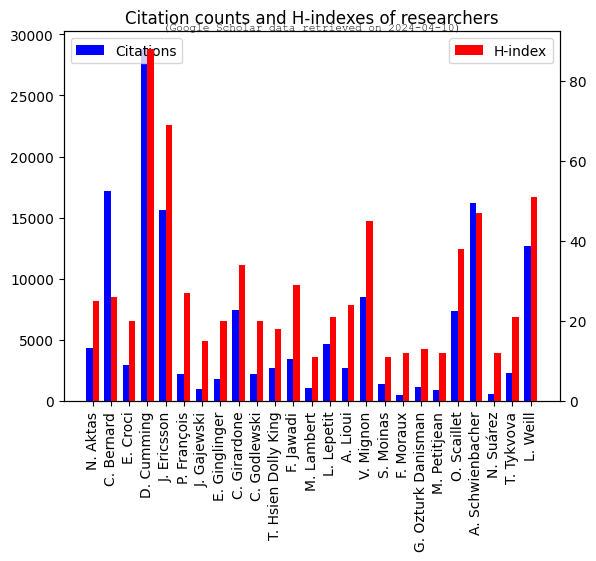

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Sort the DataFrame by the second word in the researcher names
output_df = output_df.sort_values(by='NAME', key=lambda x: x.str.split().str[1])

# Transform the 'NAME' column to show only the first initial of the first name
output_df['NAME'] = output_df['NAME'].apply(lambda x: ' '.join([word[0]+'.' if i == 0 else word for i, word in enumerate(x.split())]))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Set the bar width
bar_width = 0.35

# Get the number of researchers
num_researchers = np.arange(len(output_df['NAME']))

# Create a bar chart of the citation counts
bars1 = ax1.bar(num_researchers - bar_width/2, output_df['citations'], bar_width, label='Citations', color='b')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Create a bar chart of the h-indexes on the second y-axis
bars2 = ax2.bar(num_researchers + bar_width/2, output_df['h-index'], bar_width, label='H-index', color='r')

# Set the x-axis tick labels to the researcher names
ax1.set_xticks(num_researchers)
ax1.set_xticklabels(output_df['NAME'], rotation=90)

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#Add a title
plt.title('Citation counts and H-indexes of researchers')

# Get today's date
todays_date = datetime.date.today()

# Add a note
ax1.text(0.5, 1.01, f'(Google Scholar data retrieved on {todays_date})', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, font=dict(size=8, family='Courier New'))

plt.show()

## Get titles of papers citing a publication of a scholar

In [1]:
from scholarly import scholarly

# Retrieve the author's data, fill-in, and print
search_query = scholarly.search_author('Christophe Godlewski')
first_author_result = next(search_query)
author = scholarly.fill(first_author_result)

# Take a closer look at the first publication
first_publication = author['publications'][0]
first_publication_filled = scholarly.fill(first_publication)

# Which papers cited that publication?
citations = [citation['bib']['title'] for citation in scholarly.citedby(first_publication_filled)]
print(citations)


['A bibliometric review of sukuk literature', 'Influential and intellectual structure of Islamic finance: a bibliometric review', 'Islam and economic performance: Historical and contemporary links', 'The topics of Islamic economics and finance research', 'Performance and productivity in Islamic and conventional banks: Evidence from the global financial crisis', 'Dynamic dependence of the global Islamic equity index with global conventional equity market indices and risk factors', 'An overview of Islamic finance', 'Islamic finance: Opportunities, challenges, and policy options', 'Bank overall financial strength: Islamic versus conventional banks', 'Asymmetric relationship between green bonds and Sukuk markets: The role of global risk factors', 'An empirical investigation of market risk, dependence structure, and portfolio management between green bonds and international financial markets', 'A bibliometric analysis of quality research papers in Islamic finance: evidence from Web of Scien

## Get titles & authors of papers citing a publication

In [ ]:
from scholarly import scholarly

# Search for a publication by title
search_query = scholarly.search_pubs('Another interesting paper title')
publication = next(search_query)

# Fill the publication to get the full details
publication_filled = scholarly.fill(publication)

# Get the publications that cite this publication along with their authors
citing_papers_with_authors = [(citation['bib']['title'], citation['bib']['author']) for citation in scholarly.citedby(publication_filled)]
for title, authors in citing_papers_with_authors:
    print(f"Title: {title}, Authors: {authors}")


## Get all details of papers citing a publication

In [ ]:
from scholarly import scholarly

# Search for a publication by title
search_query = scholarly.search_pubs('A specific paper title')
publication = next(search_query)

# Fill the publication to get the full details
publication_filled = scholarly.fill(publication)

# Get the publications that cite this publication
for citation in scholarly.citedby(publication_filled):
    title = citation['bib']['title']
    authors = citation['bib']['author']
    year = citation['bib']['pub_year']
    venue = citation['bib']['venue']
    num_citations = citation.get('num_citations', 'Not available')
    abstract = citation['bib'].get('abstract', 'Abstract not available')
    
    print(f"Title: {title}")
    print(f"Authors: {authors}")
    print(f"Year: {year}")
    print(f"Venue: {venue}")
    print(f"Citations: {num_citations}")
    print(f"Abstract: {abstract}")
    print("-----")
